Setup packages

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_colwidth', None)

read data file

In [3]:
df = pd.read_csv('../nawy_dataset.csv',low_memory=False)

Exploration

In [4]:
df.head()

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified,Unnamed: 11,Unnamed: 12
0,22,Rajaa M.Mousa,Orange,message: Idea about the best area in Sheik Zaid .Also villa's prices .,2022-03-07 12:56:20.523509,generic form,none,google,dev_-_sodic,sodic october plaza,0,NaN,NaN
1,30,Sahar Shalaby,Vodafone,ad_id : 23843176891470664 \nform_id : 367745493976002 \nplatform : fb \nlead_id : 528090611274822 \n,2019-09-16 13:17:18.459000,facebook,o west - fb_creme de la creme_ cairo/giza_27-60,facebook,orascom - lead generation,o west,0,NaN,NaN
2,42,Mohamed,Vodafone,message:,2022-05-07 02:03:53.589687,generic form,gouna_-_properties,google,locations,el gouna for sale & resale,0,NaN,NaN
3,44,Maher Elnakib,Orange,ad_id : 23844249544660664 \nadset_id : 23844249544640664 \ncampaign_id : 23842950856230664 \nconfirm_your_phone_number : 01270061104 \ncreated_time : 2019-12-19T22:55:51+0000 \nform_id : 463734814544456 \nfacebook_id : 2614322275469063 \nplatform : fb \nyour_budget : As you wrote \n,2019-12-19 22:56:46.662000,facebook,new release north edge general with north coast interests,facebook,city edge - lead generation,north edge,0,NaN,NaN
4,48,pierre,Vodafone,message:,2022-01-27 05:56:22.806753,top compounds form,none,google,dev_-_inertia_egypt,joulz,0,NaN,NaN


In [5]:
df.tail()

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified,Unnamed: 11,Unnamed: 12
91124,101024,Abadi Ahmeed,Gulf,ad_id : 23850279525690562 \nadgroup_id : 23850279525690562 \nadset_id : 23850279525680562 \ncampaign_id : 23848309616020562 \nconfirm_your_phone_number_ : 0556644393 \ncreated_time : 2022-06-06T10:42:13+0000 \nform_id : 1088953991949500 \nFacebook_id : 358160292973232 \nleadgen_id : 358160292973232 \npage_id : 653106524827671 \nplatform : fb \nميزانية_ : ٢-٣ مليون \nنوع_الوحدة_ : فيلا \n,2022-06-06 10:42:19.756014,facebook,the lakes bloomfields - khaleeji lookalike - new cairo,facebook,tatweer misr - lead generation - cooing 2 - new,mostakbal city villa offer,0,NaN,NaN
91125,101025,Nermine Elassey,Orange,ad_id : 23850531682810398 \nadgroup_id : 23850531682810398 \nadset_id : 23850531682800398 \ncampaign_id : 23850492403650398 \ncreated_time : 2022-06-06T10:45:38+0000 \nform_id : 1074926903369744 \nFacebook_id : 420636419694397 \nleadgen_id : 420636419694397 \npage_id : 653106524827671 \nplatform : fb \nبرجاء_تأكيد_رقم_الهاتف : ٠١٢٧٧٣٦٦٧٧٣ \n,2022-06-06 10:45:44.002419,facebook,telal sahel - no targeting - north coast,facebook,roya - lead generation - cooing 3 - new,telal sahel,0,NaN,NaN
91126,101026,mohamed sherif,Orange,message:,2022-06-06 10:51:46.991162,generic form,waterway_branded_residences,google,dev_-_equity,the waterway branded residences,0,NaN,NaN
91127,101027,Ahmed Monir Mostafa Hosny,Orange,ad_id : 23850616546710398 \nadgroup_id : 23850616546710398 \nadset_id : 23850616546700398 \ncampaign_id : 23850492403650398 \ncreated_time : 2022-06-06T10:52:19+0000 \nform_id : 1074926903369744 \nFacebook_id : 714331776350297 \nleadgen_id : 714331776350297 \npage_id : 653106524827671 \nplatform : fb \nبرجاء_تأكيد_رقم_الهاتف : 01222184454 \n,2022-06-06 10:52:25.310426,facebook,telal sahel - gouna lookalike - north coast,facebook,roya - lead generation - cooing 3 - new,telal sahel,0,NaN,NaN
91128,101032,Raghda Mohamed,Vodafone,ad_id : 23851345729510299 \nadgroup_id : 23851345729510299 \nadset_id : 23851345729500299 \ncampaign_id : 23850377713670299 \ncreated_time : 2022-06-06T11:08:56+0000 \nform_id : 1074926903369744 \nFacebook_id : 707544087221812 \nleadgen_id : 707544087221812 \npage_id : 653106524827671 \nplatform : fb \nبرجاء_تأكيد_رقم_الهاتف : 01098301766 \n,2022-06-06 11:09:02.837606,facebook,telal sahel --second home lookalikes--north coast,facebook,roya - lead generation - cooing 5,telal sahel,0,NaN,NaN


In [6]:
df.columns

Index(['lead_id', 'customer_name', 'lead_mobile_network', 'message',
       'lead_time', 'method_of_contact', 'ad_group', 'lead_source', 'campaign',
       'location', 'low_qualified', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91129 entries, 0 to 91128
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lead_id              91129 non-null  int64  
 1   customer_name        91129 non-null  object 
 2   lead_mobile_network  91128 non-null  object 
 3   message              89091 non-null  object 
 4   lead_time            91129 non-null  object 
 5   method_of_contact    91129 non-null  object 
 6   ad_group             91057 non-null  object 
 7   lead_source          91129 non-null  object 
 8   campaign             90349 non-null  object 
 9   location             90980 non-null  object 
 10  low_qualified        91129 non-null  object 
 11  Unnamed: 11          8 non-null      object 
 12  Unnamed: 12          1 non-null      float64
dtypes: float64(1), int64(1), object(11)
memory usage: 9.0+ MB


In [8]:
df.isna().sum()

lead_id                    0
customer_name              0
lead_mobile_network        1
message                 2038
lead_time                  0
method_of_contact          0
ad_group                  72
lead_source                0
campaign                 780
location                 149
low_qualified              0
Unnamed: 11            91121
Unnamed: 12            91128
dtype: int64

# Target Exploration (Low_qualified)

In [10]:
df.low_qualified.value_counts()
#we need to check different values rather than 0,1, I think it's wrong from data entry

0                             75136
1                             15985
none                              3
club residences                   1
ora                               1
mountain view ras el hekma        1
address east                      1
newshunt360.com                   1
Name: low_qualified, dtype: int64

- I think Unnamed: 11,12 should be values of low_qualified, So let's focus on them more
- There are another values for target column not only 0,1

In [13]:
df[~df['Unnamed: 11'].isna()]

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified,Unnamed: 11,Unnamed: 12
41169,54265,آلاء خالد,?,Vodafone,ad_id : 23848437135960398 \nadgroup_id : 23848437135960398 \nadset_id : 23848437135950398 \ncampaign_id : 23848381607790398 \ncreated_time : 2021-10-05T02:20:08+0000 \nform_id : 222943659701785 \nFacebook_id : 1291325117965079 \nleadgen_id : 1291325117965079 \npage_id : 653106524827671 \nplatform : fb \n,2021-10-05 02:20:12.510749,facebook,club residences - general audience with real estate interests,facebook,facebook,club residences,1,NaN
46959,59376,ابو مازن,Vodafone,Called us 12,30 tried to call back busy,2021-11-14 12:15:48.090683,phone,none,hotline,hotline,none,1,NaN
46960,59376,ابو مازن,Vodafone,Called us 12,30 tried to call back busy,2021-11-14 13:33:13.033979,phone,none,hotline,hotline,none,1,NaN
55210,66510,Yousra,Gulf,https://m.facebook.com/sto...p,sfnsn=scwspwa,2022-01-09 08:37:11.382320,whatsapp,none,facebook,facebook,ora,0,NaN
73220,83114,naj,NaN,Vodafone,out of service,2022-04-05 18:59:39.015907,generic form,none,google,google,mountain view ras el hekma,0,NaN
75739,85421,Doaa,Vodafone,Whatsapp number,1020669678,2022-04-15 12:59:05.961885,phone,none,google,google,none,0,NaN
76412,86081,ki,hykjghk,Etisalat,message:,2022-04-18 21:05:13.443722,generic form,none,google,google,address east,1,NaN
85424,94815,elijah,Gulf,message: [p[p0-I am Outreach Back-Links Builder(Affiliated with Freelancer SEO Company) I provide backlinks on high-quality sites which helps to rank your site in google Features,1. Google indexed blogs 2. Instant Publishing 3. Instant Editing 4. High Authority US/UK Based blogs (guest post & existing post available) 5. Affordable prices 6. Do-follow and permanent links You can check these sites and if you need my full sites list then please also let me know your budget http://sthint.com/ https://paidguestposting.com/ https://chalagy.com/ https://minibighype.com/ https://ameyawdebrah.com/ Sample of the sites,https://savedelete.com/finance/how-did-binance-become-the-largest-exchange/347473/ https://techlogitic.net/what-is-the-most-powerful-portable-charger/ https://expressdigest.com/investigators-will-probe-how-stonehaven-rail-crash-went-unnoticed-due-to-poor-phone-signal/ If you are interested or have any queries please let us know? Waiting for your kind reply! Best Regards,2022-05-17 12:30:41.460759,newshunt360.com,none,(none),newshunt360.com,none,1.0


In [14]:
df[~df['Unnamed: 12'].isna()]

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified,Unnamed: 11,Unnamed: 12
85424,94815,elijah,Gulf,message: [p[p0-I am Outreach Back-Links Builder(Affiliated with Freelancer SEO Company) I provide backlinks on high-quality sites which helps to rank your site in google Features,1. Google indexed blogs 2. Instant Publishing 3. Instant Editing 4. High Authority US/UK Based blogs (guest post & existing post available) 5. Affordable prices 6. Do-follow and permanent links You can check these sites and if you need my full sites list then please also let me know your budget http://sthint.com/ https://paidguestposting.com/ https://chalagy.com/ https://minibighype.com/ https://ameyawdebrah.com/ Sample of the sites,https://savedelete.com/finance/how-did-binance-become-the-largest-exchange/347473/ https://techlogitic.net/what-is-the-most-powerful-portable-charger/ https://expressdigest.com/investigators-will-probe-how-stonehaven-rail-crash-went-unnoticed-due-to-poor-phone-signal/ If you are interested or have any queries please let us know? Waiting for your kind reply! Best Regards,2022-05-17 12:30:41.460759,newshunt360.com,none,(none),newshunt360.com,none,1.0


Filling low_qualified by values in Unnamed 11,12 columns 

In [20]:
df.iloc[85424,df.columns.get_loc('Unnamed: 12')]

1.0

In [5]:
df.iloc[85424, df.columns.get_loc('low_qualified')] = str(int(df.iloc[85424,df.columns.get_loc('Unnamed: 12')]))
df.iloc[85424, df.columns.get_loc('low_qualified')] 

'1'

In [6]:
lead_ids_list = list(df[~df['Unnamed: 11'].isna()].index)
#remove index which handled by Unnamed: 12
lead_ids_list.remove(85424)

- put values of low_qualified on location
- put values of campaign on lead_source
- put values of Unnamed:11 on low_qualified

In [7]:
for i in lead_ids_list:
    df.iloc[i, df.columns.get_loc('location')] = df.iloc[i,df.columns.get_loc('low_qualified')]
    df.iloc[i, df.columns.get_loc('lead_source')] = df.iloc[i,df.columns.get_loc('campaign')]
    df.iloc[i, df.columns.get_loc('low_qualified')] = df.iloc[i,df.columns.get_loc('Unnamed: 11')]
    

df[~df['Unnamed: 11'].isna()]

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified,Unnamed: 11,Unnamed: 12
41169,54265,آلاء خالد,?,Vodafone,ad_id : 23848437135960398 \nadgroup_id : 23848437135960398 \nadset_id : 23848437135950398 \ncampaign_id : 23848381607790398 \ncreated_time : 2021-10-05T02:20:08+0000 \nform_id : 222943659701785 \nFacebook_id : 1291325117965079 \nleadgen_id : 1291325117965079 \npage_id : 653106524827671 \nplatform : fb \n,2021-10-05 02:20:12.510749,facebook,facebook,facebook,club residences,1,1,NaN
46959,59376,ابو مازن,Vodafone,Called us 12,30 tried to call back busy,2021-11-14 12:15:48.090683,phone,hotline,hotline,none,1,1,NaN
46960,59376,ابو مازن,Vodafone,Called us 12,30 tried to call back busy,2021-11-14 13:33:13.033979,phone,hotline,hotline,none,1,1,NaN
55210,66510,Yousra,Gulf,https://m.facebook.com/sto...p,sfnsn=scwspwa,2022-01-09 08:37:11.382320,whatsapp,facebook,facebook,ora,0,0,NaN
73220,83114,naj,NaN,Vodafone,out of service,2022-04-05 18:59:39.015907,generic form,google,google,mountain view ras el hekma,0,0,NaN
75739,85421,Doaa,Vodafone,Whatsapp number,1020669678,2022-04-15 12:59:05.961885,phone,google,google,none,0,0,NaN
76412,86081,ki,hykjghk,Etisalat,message:,2022-04-18 21:05:13.443722,generic form,google,google,address east,1,1,NaN
85424,94815,elijah,Gulf,message: [p[p0-I am Outreach Back-Links Builder(Affiliated with Freelancer SEO Company) I provide backlinks on high-quality sites which helps to rank your site in google Features,1. Google indexed blogs 2. Instant Publishing 3. Instant Editing 4. High Authority US/UK Based blogs (guest post & existing post available) 5. Affordable prices 6. Do-follow and permanent links You can check these sites and if you need my full sites list then please also let me know your budget http://sthint.com/ https://paidguestposting.com/ https://chalagy.com/ https://minibighype.com/ https://ameyawdebrah.com/ Sample of the sites,https://savedelete.com/finance/how-did-binance-become-the-largest-exchange/347473/ https://techlogitic.net/what-is-the-most-powerful-portable-charger/ https://expressdigest.com/investigators-will-probe-how-stonehaven-rail-crash-went-unnoticed-due-to-poor-phone-signal/ If you are interested or have any queries please let us know? Waiting for your kind reply! Best Regards,2022-05-17 12:30:41.460759,newshunt360.com,none,(none),1,none,1.0


In [8]:
#check low_qualified values now 
df.low_qualified.unique()
#perfect

array(['0', '1'], dtype=object)

In [13]:
(df.low_qualified.value_counts())#/len(df)*100
#imbalanced target values

0    75139
1    15990
Name: low_qualified, dtype: int64

Text(0.5, 0, 'Count')

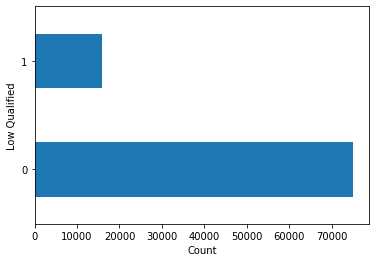

In [31]:
#plot it's count
df.low_qualified.value_counts().plot(kind='barh')
plt.ylabel("Low Qualified")
plt.xlabel("Count")

# Decision, 
##### Drop columns
After we filling Low_qualified with them, I will drop  Unnamed 11, 12 column 

In [37]:
df.drop(['Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)

In [40]:
#check of the dropping 
df.columns

Index(['lead_id', 'customer_name', 'lead_mobile_network', 'message',
       'lead_time', 'method_of_contact', 'ad_group', 'lead_source', 'campaign',
       'location', 'low_qualified'],
      dtype='object')

Important Note : customer may reach more than one time which mean lead_id may be duplicates in two rows but let's check the difference 

In [29]:
'There are : {} unique customer out of : {} customer which means that there are : {} rows for customers reached twice or may more '.format(len(df.lead_id.unique()),len(df),len(df)-len(df.lead_id.unique()))

'There are : 72294 unique customer out of : 91129 customer which means that there are : 18835 rows for customers reached twice or may more '

# Customers exploration

In [15]:
df_lead_id = df.groupby(['lead_id','low_qualified','customer_name']).size().to_frame('leaded_times').reset_index()
df_lead_id.sort_values(by='leaded_times',ascending=False)

,lead_id,low_qualified,customer_name,leaded_times
45680,69334,1,Test,337
51212,75772,1,Testttttttt,103
13701,31069,1,Sammar Hosny,57
35146,57328,1,محمود عواد شلية العلاطي الجهني,46
95,1116,0,Germeen Ibrahim,45
...,...,...,...,...
25920,46815,0,Yassmin Abas,1
25921,46816,0,Nada hafez,1
25922,46817,0,Ashraf Elgazzar,1
25923,46818,0,عبدالحميد السيد,1


- after review customer name of the most customers leaded times (Test, Testtttt) -> we need to check them carefully

In [46]:
df.loc[df['lead_id']==69334]

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
58367,69334,Test,Etisalat,message:,2022-01-31 09:47:12.235759,website,none,website,none,"{""propertyid""=>10677}",1
58368,69334,Test,Etisalat,message:,2022-01-31 10:00:09.765755,website,none,website,none,"{""propertyid""=>10693}",1
58369,69334,Test,Etisalat,message:,2022-01-31 10:05:56.809316,website,none,website,none,"{""propertyid""=>3591}",1
58370,69334,Test,Etisalat,message:,2022-01-31 10:14:59.302618,website,none,website,none,"{""propertyid""=>4379}",1
58371,69334,Test,Etisalat,message:,2022-01-31 10:47:00.023432,website,none,website,none,"{""propertyid""=>10545}",1
...,...,...,...,...,...,...,...,...,...,...,...
58699,69334,Test,Etisalat,message:,2022-05-26 12:14:58.184220,organic form,none,organic form,none,badya palm hills,1
58700,69334,Test,Etisalat,message:,2022-05-26 12:16:37.614666,website,none,website,none,mountain view - icity - october,1
58701,69334,Test,Etisalat,message:,2022-06-05 13:40:06.610580,website,none,website,none,mountain view - icity - october,1
58702,69334,Test,Etisalat,message:,2022-06-05 15:51:19.633910,website,none,website,none,mountain view - icity - october,1


In [47]:
df.loc[df['lead_id']==75772]

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
65508,75772,Testttttttt,Vodafone,message:,2022-02-28 12:14:42.726191,semrush.com,none,semrush.com,(none),zia business complex,1
65509,75772,Testttttttt,Vodafone,message:,2022-02-28 12:15:50.438320,semrush.com,none,semrush.com,(none),zia business complex,1
65510,75772,Testttttttt,Vodafone,message:,2022-02-28 12:16:58.867271,semrush.com,none,semrush.com,(none),zia business complex,1
65511,75772,Testttttttt,Vodafone,message:,2022-02-28 12:17:37.150785,semrush.com,none,semrush.com,(none),zia business complex,1
65512,75772,Testttttttt,Vodafone,message:,2022-02-28 12:20:03.676235,semrush.com,none,semrush.com,(none),zia business complex,1
...,...,...,...,...,...,...,...,...,...,...,...
65606,75772,Testttttttt,Vodafone,message:,2022-05-26 08:25:37.948805,website,none,website,none,mountain view - icity - october,1
65607,75772,Testttttttt,Vodafone,message:,2022-05-26 08:25:49.394768,organic form,none,organic form,none,mountain view - icity - october,1
65608,75772,Testttttttt,Vodafone,message:,2022-05-26 12:20:16.729310,website,none,website,none,mountain view - icity - october,1
65609,75772,Testttttttt,Vodafone,message:,2022-05-26 12:21:43.056968,website,none,website,none,mountain view - icity - october,1


- I think it's a fake data 

In [52]:
df_lead_id[df_lead_id['leaded_times'] == 57].low_qualified.unique()

array(['1'], dtype=object)

- we have two customers leaded more than 45 time and they are high qualified
- while we need to focus more on  group under 45 and why they are low qualified

In [53]:
df_lead_less_45 = df_lead_id[df_lead_id.leaded_times <= 45]
df_lead_less_45_more_2 = df_lead_less_45[df_lead_less_45.leaded_times>=2]
df_lead_less_45_more_2.low_qualified.value_counts()
# sns.barplot(x='leaded_times', y='low_qualified', data=df_lead_less_45)

0    9447
1    1967
Name: low_qualified, dtype: int64

#### The most are low qualified 
#### So I think reaching customer more than once is not a measure of high qualifications in range 2:45 , but in range more than 45 it works (need to go more deep)

In [54]:
df_lead_id.columns

Index(['lead_id', 'low_qualified', 'customer_name', 'leaded_times'], dtype='object')

- There are customers which are leaded from 2 times til 57 and some lead only one time

In [62]:
df_lead_id.leaded_times.unique()

array([  1,   2,   3,   5,   4,  45,   7,  36,   9,   8,   6,  10,  11,
        14,  13,  12,  27,  31,  33,  57,  21,  15,  22,  17,  25,  18,
        29,  46,  16,  20,  44, 337, 103,  37], dtype=int64)

# What about adding (Leaded_times) as a new feature
- number of leaded times 

In [16]:
df_lead_id.columns

Index(['lead_id', 'low_qualified', 'customer_name', 'leaded_times'], dtype='object')

In [65]:
#ToDO
df_lead_id[['lead_id','leaded_times']].sort_values(by='leaded_times',ascending=False)

,lead_id,leaded_times
45680,69334,337
51212,75772,103
13701,31069,57
35146,57328,46
95,1116,45
...,...,...
25920,46815,1
25921,46816,1
25922,46817,1
25923,46818,1


In [20]:
leaded_df = df_lead_id[['lead_id','leaded_times']]
leaded_df

,lead_id,leaded_times
0,22,1
1,30,1
2,42,1
3,44,1
4,48,1
...,...,...
72289,101024,1
72290,101025,1
72291,101026,1
72292,101027,1


In [21]:
leaded_dict  = dict(zip(leaded_df.lead_id,leaded_df.leaded_times))

In [31]:
df['leaded_times'] = df.lead_id.apply(lambda x:leaded_dict[x])

In [33]:
df[['lead_id','leaded_times']].sort_values(by='leaded_times',ascending=False)

,lead_id,leaded_times
58474,69334,337
58490,69334,337
58454,69334,337
58603,69334,337
58469,69334,337
...,...,...
35632,49543,1
35633,49544,1
35634,49549,1
35635,49550,1


# Missing values

In [84]:
df.isna().sum()

lead_id                   0
customer_name             0
lead_mobile_network       1
message                2038
lead_time                 0
method_of_contact         0
ad_group                 72
lead_source               0
campaign                780
location                149
low_qualified             0
dtype: int64

## ad_group : Include information of target audience used in the campaign

In [34]:
df.ad_group.value_counts()

none                                                                              39835
mountain view october - khaleeji lookalike 3%                                       995
mountain view october - general audience with investment/real estate interests      697
aura apartments - general audience real estate interests                            550
the lakes bloomfields - khaleeji lookalike                                          473
                                                                                  ...  
zed west - new cairo & 6th of october lookalike                                       1
creek town - new cairo & 6th of october lookalike                                     1
october plaza - general audience with real estate interests                           1
telal sokhna - frequent international travelers 25-34 cairo                           1
aura apartments - general audience real estate interests - new cairo                  1
Name: ad_group, Length: 2480, dt

In [31]:
df.ad_group.isna().value_counts()

False    91057
True        72
Name: ad_group, dtype: int64

In [32]:
len(df.ad_group.value_counts()==1)

2480

In [33]:
len(df.ad_group.unique())

2481

In [87]:
len(df[df.ad_group=='none'])/len(df) * 100

43.71275883637481

- ad_group feature has the following :
   - 72 nan value 
   - 39835 values of none, which may considered as nan 
   - 2480 group which contains only one customer
   - 2481 different ad_group 
   - 44% are missing

- I will suggest to apply clustering or segmentations 
- For now this feature will not be important, so I think droping it or didn't consider it with features is a good decision 

In [88]:
df.drop(['ad_group'],axis=1,inplace=True)

In [89]:
df.columns

Index(['lead_id', 'customer_name', 'lead_mobile_network', 'message',
       'lead_time', 'method_of_contact', 'lead_source', 'campaign', 'location',
       'low_qualified'],
      dtype='object')

## campaign : Name of the targeting campaign


- 780 : missing targeting campaign
- 762 : different campaign

In [90]:
#check campaign 
len(df.campaign.unique())

762

In [37]:
df[df.campaign.isna()].sample(10)

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,lead_source,campaign,location,low_qualified
37309,51007,Hazem,Vodafone,Promo Code: 311400116022,2021-09-08 12:18:29.468877,vodafone,vodafone,NaN,new cairo,1
16618,30704,Shaimaa,Etisalat,We’re supposed to meet at 2 but she’s not answering my calls men 12:30,2021-02-14 12:19:40.395000,phone,phone,NaN,kinda,0
35360,49306,Mahmoud anwar,Vodafone,Promo Code: 314817017341,2021-08-27 14:17:33.246882,vodafone,vodafone,NaN,north coast,0
37423,51069,Mohammed El-Feki,Vodafone,Promo Code: 317718400403,2021-09-08 12:25:37.531735,vodafone,vodafone,NaN,el shorouk,0
63372,73754,Mostafa sayed,Vodafone,karem kman klmo w hoa mardesh,2022-02-18 13:54:32.178976,personal,personal,NaN,none,0
37605,51164,Yousef Ahmed,Vodafone,Promo Code: 0020,2021-09-08 13:01:51.026370,vodafone,vodafone,NaN,new heliopolis,0
37733,51282,Mohmed okela,Vodafone,Promo Code: 133150737549,2021-09-08 18:01:47.963383,vodafone,vodafone,NaN,new cairo,1
37602,51161,Tamer youssef,Vodafone,Promo Code: 310928508226,2021-09-08 12:59:37.436534,vodafone,vodafone,NaN,ain sokhna,0
37901,51432,Mohmed hany,Vodafone,Promo Code: mohamedhany1449@gmail.com,2021-09-09 20:57:09.751392,vodafone,vodafone,NaN,new cairo,1
37278,50995,Fatma Ali Hassan,Vodafone,Promo Code: 317558855201,2021-09-08 12:17:11.059669,vodafone,vodafone,NaN,new heliopolis,1


- I couldn't see how to fill missing values, So I will ask domain expert : Is location related to campaign or not ? 
- But I will not consider it in my features for now

In [35]:
#check how much they are similar
len(df[df.campaign == df.location])

11859

In [46]:
#fill missing of campaign by location values
df.campaign.fillna(df.location, inplace=True)

In [50]:
df.campaign.isna().sum()

0

## lead_mobile_network : To differentiate between local and international customers

In [38]:
#check lead mobile network column
df.lead_mobile_network.unique()

array(['Orange', 'Vodafone', 'Etisalat', 'Gulf', 'US_Canda', 'Others',
       'Europe', 'WE', '?', nan, 'hykjghk'], dtype=object)

In [39]:
df[df.lead_mobile_network.isna()] 

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,lead_source,campaign,location,low_qualified
73220,83114,naj,NaN,Vodafone,out of service,2022-04-05 18:59:39.015907,none,google,mountain view ras el hekma,0


Solution

In [52]:
#replace Nan with value of message
df.iloc[73220, df.columns.get_loc('lead_mobile_network')] = 'Vodafone'
df.iloc[73220].lead_mobile_network

'Vodafone'

In [53]:
df[(df.lead_mobile_network=='?') | (df.lead_mobile_network == 'hykjghk')]
# Todo replace it with value of message

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified,leaded_times
41169,54265,آلاء خالد,?,Vodafone,ad_id : 23848437135960398 \nadgroup_id : 23848437135960398 \nadset_id : 23848437135950398 \ncampaign_id : 23848381607790398 \ncreated_time : 2021-10-05T02:20:08+0000 \nform_id : 222943659701785 \nFacebook_id : 1291325117965079 \nleadgen_id : 1291325117965079 \npage_id : 653106524827671 \nplatform : fb \n,2021-10-05 02:20:12.510749,facebook,facebook,facebook,club residences,1,1
76412,86081,ki,hykjghk,Etisalat,message:,2022-04-18 21:05:13.443722,generic form,google,google,address east,1,1


Solution

In [54]:
#replace values of ?, nan , hykjghk with the corrosponding value in message column
df.iloc[41169, df.columns.get_loc('lead_mobile_network')] = 'Vodafone'
df.iloc[76412, df.columns.get_loc('lead_mobile_network')] = 'Etisalat'
df.iloc[41169].lead_mobile_network,df.iloc[76412].lead_mobile_network

('Vodafone', 'Etisalat')

In [55]:
#check modification 
df.lead_mobile_network.unique()

array(['Orange', 'Vodafone', 'Etisalat', 'Gulf', 'US_Canda', 'Others',
       'Europe', 'WE'], dtype=object)

- I need to check 'others' 
- After search with Gulf it's a company in Kwait (outside)
- So I will categorize customers as inside and outside 

<AxesSubplot:xlabel='lead_mobile_network', ylabel='customer_name'>

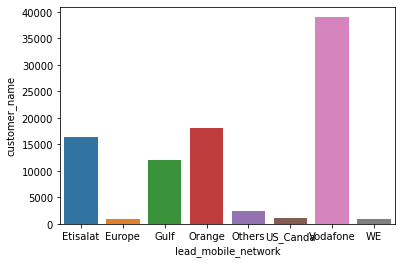

In [56]:
df_lmn = df.groupby('lead_mobile_network')['customer_name'].count().reset_index()

sns.barplot(x='lead_mobile_network', y='customer_name', data=df_lmn)

In [58]:
df_lmn.sort_values(by='customer_name',ascending=False)

,lead_mobile_network,customer_name
6,Vodafone,39048
3,Orange,18071
0,Etisalat,16463
2,Gulf,12070
4,Others,2422
5,US_Canda,1149
1,Europe,1025
7,WE,881


- vodafone is the most network 
- I will consider others as outside group, since data has the only 4 networks in Egypt (We,vodafone,etisalt)
- I will consider Gulf,others,Us_canda,Europe as outside 

### Create a new feature for each user as inside / outside

In [59]:
in_side = ['Etisalat','WE','Vodafone','Orange']
# out_side = ['Gulf','Others','US_Canda','Europe']
df['in_out_side'] = np.where(df['lead_mobile_network'].isin(in_side) ,1,0)
df['in_out_side']

0        1
1        1
2        1
3        1
4        1
        ..
91124    0
91125    1
91126    1
91127    1
91128    1
Name: in_out_side, Length: 91129, dtype: int32

In [60]:
df_in_out = df.groupby('in_out_side')['lead_id'].count().reset_index()
df_in_out

,in_out_side,lead_id
0,0,16666
1,1,74463


<AxesSubplot:xlabel='in_out_side', ylabel='lead_id'>

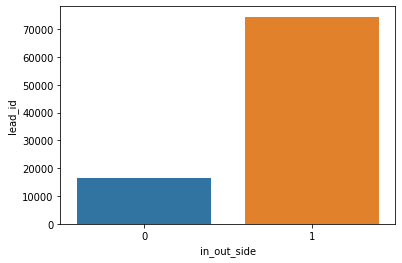

In [48]:
sns.barplot(x='in_out_side', y='lead_id', data=df_in_out)

- 16,666 outside egypt
- 74,463 inside egypt 
- I think it's important feature

Back again to missing values 

In [61]:
df.isna().sum()
# I will ignore campaign till ask domain expert 
# Let's see message and location features

lead_id                   0
customer_name             0
lead_mobile_network       0
message                2038
lead_time                 0
method_of_contact         0
ad_group                 72
lead_source               0
campaign                  0
location                149
low_qualified             0
leaded_times              0
in_out_side               0
dtype: int64

## message : message left by the customer

In [50]:
#check message column
df.message.head(10)

0                                                                                                                                                                                                                                                                                         message: Idea about  the best area in Sheik Zaid .Also villa's prices .
1                                                                                                                                                                                                                                                            ad_id : 23843176891470664 \nform_id : 367745493976002 \nplatform : fb \nlead_id : 528090611274822 \n
2                                                                                                                                                                                                                                                                                                   

In [51]:
df.message.tail(10)

91119                                              ad_id : 23850346208560664 \nadgroup_id : 23850346208560664 \nadset_id : 23850346208570664 \ncampaign_id : 23848866204130664 \ncreated_time : 2022-06-06T10:17:03+0000 \nform_id : 1074926903369744 \nFacebook_id : 1281378559356652 \nleadgen_id : 1281378559356652 \npage_id : 653106524827671 \nplatform : fb \nبرجاء_تأكيد_رقم_الهاتف : 00966596580804 \n
91120                                                                                                                                                                                                                                                                                                                                                                                                 message: 
91121                            I would like more information on او ويست أكتوبر  , Egypt. -https://www.nawy.com/prime-compounds/او ويست أكتوبر?utm_source=google&utm_medium=cpc&utm_campaign=Dev_-_ORAS

In [52]:
df.message.sample(10)

18225                                             ad_id : 23847707735470540 \nadgroup_id : 23847707735470540 \nadset_id : 23847707734730540 \ncampaign_id : 23847707734610540 \ncreated_time : 2021-03-30T23:06:42+0000 \nform_id : 3820212661406195 \nFacebook_id : 494547604919114 \nleadgen_id : 494547604919114 \npage_id : 653106524827671 \nplatform : ig \n
3414                                                                                                                                                      location : https://www.cooingestate.com/prime-compounds/Bloomfields in Mostakbal City by Tatweer Misr?gclid=Cj0KCQjwrrXtBRCKARIsAMbU6bF3q5ZwkM_bK6fk-KLfUED5XvxXZgJQRgsCYPUXzA10w3Z8aw2yvFcaAq-lEALw_wcB
90211                                                                                                                                                                                                                                                                                             

- For message 
    - I have see important messages which are specific, and other messages which I think they filled using database Like below
    "ad_id : 23844066893380664 \nadgroup_id : 23844066893380664 \nadset_id : 23843456862490664 \ncampaign_id : 23843456650710664 \ncreated_time : 2020-11-10T04:54:24+0000 \nform_id : 1295509457298585 \nfacebook_id : 394712885225981 \nleadgen_id : 394712885225981 \npage_id : 653106524827671 \nplatform : fb \n"
    - I suggest to filter important message and apply NLP (Future Work) - to detect something from it
- For now I will not go with it 

## Location : The location which the customer is searching for

In [53]:
df.location.isna().sum()

149

In [54]:
df.location.value_counts()

none                                       12965
marassi                                     3402
mountain view october apartments            2521
badya                                       1836
palm hills new cairo                        1829
                                           ...  
taj city svilla                                1
the capitalway new capital                     1
mivida, new cairo , egypt                      1
tagmoua                                        1
الأسكندرية عمارات مصطفي كامل الاستثماري        1
Name: location, Length: 3143, dtype: int64

In [55]:
df[df.location=='none']

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,lead_source,campaign,location,low_qualified,in_out_side
15,152,Eslam,Gulf,location : https://old.nawy.com/top-compounds/40?lang=en&utm_campaign=DEV_-_MISR_ITALIA&utm_adgroup=Sila&gclid=CjwKCAjwlYCHBhAQEiwA4K21m6X978wvU_6P5Rs-T0vSbE9u9rmT3bH97g0Lr0gSXVs5CknBgM3TihoCxmwQAvD_BwE,2021-07-03 17:27:18.519000,whatsapp,landing page,none,none,0,0
17,193,Marwan Ramadan,Orange,"I would like more information on Layan, New Cairo , Egypt. -https://www.nawy.com/compound/249-layan?utm_source=google&utm_medium=cpc&utm_campaign=Dynamic_Targeting_-_Fergany&utm_adgroup=Ad_group_1&utm_term=&gclid=Cj0KCQjwyMiTBhDKARIsAAJ-9VszAomJugisXCngaUziJc_43GltFg4HpnAY6DUo8jpdQHE8tNP12iIaAjCmEALw_wcB?utm_source=google&utm_medium=cpc&utm_campaign=Dynamic_Targeting_-_Fergany&utm_adgroup=Ad_group_1&utm_term=&gclid=Cj0KCQjwyMiTBhDKARIsAAJ-9VszAomJugisXCngaUziJc_43GltFg4HpnAY6DUo8jpdQHE8tNP12iIaAjCmEALw_wcB&a=1780187227.1651686203&compound=Layan\n",2022-05-04 17:43:59.967480,whatsapp,website,none,none,0,1
18,219,Sherif Nashed,Orange,message : Selling a flat in Soleya and buying another flat ready to move in. Preferable locations are Sheikh Zayed or fifth settlement.,2019-10-15 05:11:07.445000,organic form,organic search,(none),none,0,1
24,254,Abir ELsayed ahmed,Gulf,message : More details about the available unit and price,2021-03-29 07:11:22.947000,form adwords,google,dev_-_mountain_view,none,0,0
35,409,Mohammed gharib,Orange,NaN,2021-08-15 15:04:24.035000,phone,facebook,none,none,0,1
...,...,...,...,...,...,...,...,...,...,...,...
91114,101013,Rubbish,Vodafone,ممكن تفاصيل \nالايجار,2022-06-06 09:58:13.750697,whatsapp,website,none,none,0,1
91115,101015,Lamiaa Mohamed,Gulf,"I would like more information on أو ويست أوراسكوم, السادس من اكتوبر , Egypt. -https://www.nawy.com/compound/258-أو-ويست-أوراسكوم?utm_source=google&utm_medium=cpc&utm_campaign=Dev_-_ORASCOM&utm_adgroup=او_ويست&utm_term=فلل للبيع في اكتوبر&gclid=CjwKCAjwy_aUBhACEiwA2IHHQMVgoI2BCDyX4QH3gKOJt3u_TboWRubBrDpTQSOefPynb67TzVvEyBoCBKMQAvD_BwE?utm_source=google&utm_medium=cpc&utm_campaign=Dev_-_ORASCOM&utm_adgroup=او_ويست&utm_term=فلل للبيع في اكتوبر&gclid=CjwKCAjwy_aUBhACEiwA2IHHQMVgoI2BCDyX4QH3gKOJt3u_TboWRubBrDpTQSOefPynb67TzVvEyBoCBKMQAvD_BwE&a=1446831795.1654509813&compound=أو ويست أوراسكوم\n",2022-06-06 10:03:48.417769,whatsapp,website,none,none,0,0
91116,101016,Al Ahmady,Etisalat,Preferred to be contacted on whatsapp because of his work circumstances,2022-06-06 10:04:41.259703,phone,phone,none,none,0,1
91117,101017,Aya Saad,Vodafone,Asking about a project with 8 years payment plan,2022-06-06 10:13:22.359957,phone,phone,none,none,0,1


- 149 Nan values 
- 12965 with none values
- after lock at them to check, I couldn't filled missing and none based on another column 
- It's important feature, but has a lot of problems which can't solved at current time

In [62]:
df.columns

Index(['lead_id', 'customer_name', 'lead_mobile_network', 'message',
       'lead_time', 'method_of_contact', 'ad_group', 'lead_source', 'campaign',
       'location', 'low_qualified', 'leaded_times', 'in_out_side'],
      dtype='object')

# Features

In [63]:
features = ['lead_id','leaded_times','campaign','lead_mobile_network','method_of_contact','lead_source','in_out_side','low_qualified']

## Lead_mobile_network

In [64]:
df.lead_mobile_network.value_counts()

Vodafone    39048
Orange      18071
Etisalat    16463
Gulf        12070
Others       2422
US_Canda     1149
Europe       1025
WE            881
Name: lead_mobile_network, dtype: int64

### Encoding it using Label encoding

In [65]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Lead_mobile_network_Cat'] = labelencoder.fit_transform(df['lead_mobile_network'])
df[['lead_mobile_network','Lead_mobile_network_Cat']]

,lead_mobile_network,Lead_mobile_network_Cat
0,Orange,3
1,Vodafone,6
2,Vodafone,6
3,Orange,3
4,Vodafone,6
...,...,...
91124,Gulf,2
91125,Orange,3
91126,Orange,3
91127,Orange,3


Perfect!

## method of contact : Contact method used to reach us

In [66]:
df.method_of_contact.value_counts()

facebook                 48649
generic form              9966
whatsapp                  8444
phone                     7877
top compounds form        5768
                         ...  
personal - abdel-azim        1
referral ghanima             1
cooing client                1
personal aly rafea           1
personal/azzam               1
Name: method_of_contact, Length: 134, dtype: int64

In [67]:
len(df.method_of_contact.unique())

134

In [68]:
df['method_of_contact_Cat'] = labelencoder.fit_transform(df['method_of_contact'])
df[['method_of_contact','method_of_contact_Cat']]

,method_of_contact,method_of_contact_Cat
0,generic form,50
1,facebook,36
2,generic form,50
3,facebook,36
4,top compounds form,118
...,...,...
91124,facebook,36
91125,facebook,36
91126,generic form,50
91127,facebook,36


## Lead_source

In [69]:
len(df.lead_source.unique())

123

what about see method_of_contact with lead source to check difference

In [70]:
df[['method_of_contact','lead_source']].value_counts()

method_of_contact           lead_source               
facebook                    facebook                      48649
generic form                google                         9293
top compounds form          google                         5765
whatsapp                    website                        3464
phone                       phone                          2776
                                                          ...  
management/referral (nada)  management/referral (nada)        1
management/referral         management/referral               1
m.nearbyme.io               m.nearbyme.io                     1
m.akhbarelyom.com           m.akhbarelyom.com                 1
youtube.com                 youtube.com                       1
Length: 162, dtype: int64

In [71]:
df['lead_source_Cat'] = labelencoder.fit_transform(df['lead_source'])
df[['lead_source','lead_source_Cat']]

,lead_source,lead_source_Cat
0,google,34
1,facebook,29
2,google,34
3,facebook,29
4,google,34
...,...,...
91124,facebook,29
91125,facebook,29
91126,google,34
91127,facebook,29


In [72]:
df['campaign_cat'] = labelencoder.fit_transform(df['campaign'])
df[['campaign','campaign_cat']]

,campaign,campaign_cat
0,dev_-_sodic,241
1,orascom - lead generation,600
2,locations,454
3,city edge - lead generation,106
4,dev_-_inertia_egypt,195
...,...,...
91124,tatweer misr - lead generation - cooing 2 - new,753
91125,roya - lead generation - cooing 3 - new,676
91126,dev_-_equity,188
91127,roya - lead generation - cooing 3 - new,676


### Final features

In [73]:
df.columns

Index(['lead_id', 'customer_name', 'lead_mobile_network', 'message',
       'lead_time', 'method_of_contact', 'ad_group', 'lead_source', 'campaign',
       'location', 'low_qualified', 'leaded_times', 'in_out_side',
       'Lead_mobile_network_Cat', 'method_of_contact_Cat', 'lead_source_Cat',
       'campaign_cat'],
      dtype='object')

In [75]:
final_features = ['in_out_side', 'campaign_cat','leaded_times','Lead_mobile_network_Cat','method_of_contact_Cat', 'lead_source_Cat']
final_label = ['low_qualified']

# ML Part

In [80]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Split data

In [76]:
X = df[final_features]
X

,in_out_side,campaign_cat,leaded_times,Lead_mobile_network_Cat,method_of_contact_Cat,lead_source_Cat
0,1,241,1,3,50,34
1,1,600,1,6,36,29
2,1,454,1,6,50,34
3,1,106,1,3,36,29
4,1,195,1,6,118,34
...,...,...,...,...,...,...
91124,0,753,1,2,36,29
91125,1,676,1,3,36,29
91126,1,188,1,3,50,34
91127,1,676,1,3,36,29


In [81]:
y = df[final_label]
y['low_qualified'] = pd.to_numeric(y['low_qualified'])

C:\Users\Omar Wael\AppData\Local\Temp\ipykernel_12036\3761262810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['low_qualified'] = pd.to_numeric(y['low_qualified'])


In [82]:
y

,low_qualified
0,0
1,0
2,0
3,0
4,0
...,...
91124,0
91125,0
91126,0
91127,0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.25)

In [91]:
y.value_counts()

low_qualified
0                75139
1                15990
dtype: int64

In [96]:
model = XGBClassifier(max_depth = 10)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

In [97]:
def print_report(clf, y_pred, y_test):
    report = metrics.classification_report(y_test, y_pred,target_names=['0','1'])
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

In [98]:
print_report(model,y_pred,y_test)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     18785
           1       0.77      0.17      0.28      3998

    accuracy                           0.85     22783
   macro avg       0.81      0.58      0.59     22783
weighted avg       0.83      0.85      0.80     22783

accuracy: 0.845


In [99]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.8348438559109886, 0.8452354825966729, 0.801362455086887, None)

In [100]:
pd.DataFrame(y_pred).value_counts()

0    21917
1      866
dtype: int64

- Accuracy is tricky since all predicted class are from 0 class
- I think we need to do some sampling over data

### OverSampling

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.25)

In [101]:
from imblearn.over_sampling  import SMOTE

In [102]:
y_train.value_counts()

low_qualified
0                56354
1                11992
dtype: int64

In [103]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [104]:
y_train.value_counts()

low_qualified
0                56354
1                56354
dtype: int64

In [105]:
model = XGBClassifier(max_depth =10)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

In [106]:
print_report(model,y_pred,y_test)

              precision    recall  f1-score   support

           0       0.89      0.70      0.78     18785
           1       0.29      0.58      0.39      3998

    accuracy                           0.68     22783
   macro avg       0.59      0.64      0.59     22783
weighted avg       0.78      0.68      0.72     22783

accuracy: 0.682


In [107]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7832442354850833, 0.6819558442698503, 0.7156330587651385, None)

# Class Weights XGB

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.25)

In [115]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train.values
)

model = XGBClassifier(max_depth=10)
model.fit(X_train, y_train,sample_weight=classes_weights)
# make predictions for test data
y_pred = model.predict(X_test)

In [116]:
print_report(model,y_pred,y_test)

              precision    recall  f1-score   support

           0       0.89      0.72      0.79     18785
           1       0.31      0.60      0.41      3998

    accuracy                           0.69     22783
   macro avg       0.60      0.66      0.60     22783
weighted avg       0.79      0.69      0.73     22783

accuracy: 0.694


In [117]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7899613199896992, 0.6942896018961506, 0.7260600353615796, None)